In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stackoverflow/stackoverflow_espanhol.csv
/kaggle/input/stackoverflow/stackoverflow_ingles.csv
/kaggle/input/stackoverflow/stackoverflow_portugues.csv


In [2]:
dados_portugues = pd.read_csv('/kaggle/input/stackoverflow/stackoverflow_portugues.csv')
dados_portugues.head()

,Id,Título,Questão,Tags,Pontuação,Visualizações
0,2402,Como fazer hash de senhas de forma segura?,"<p>Se eu fizer o <em><a href=""http://pt.wikipe...",<hash><segurança><senhas><criptografia>,350,22367
1,6441,Qual é a diferença entre INNER JOIN e OUTER JOIN?,<p>Qual é a diferença entre <code>INNER JOIN</...,<sql><join>,276,176953
2,579,Por que não devemos usar funções do tipo mysql_*?,<p>Uma dúvida muito comum é por que devemos pa...,<php><mysql>,226,9761
3,2539,As mensagens de erro devem se desculpar?,<p>É comum encontrar uma mensagem de erro que ...,<aplicação-web><gui><console><ux>,214,5075
4,17501,"Qual é a diferença de API, biblioteca e Framew...",<p>Me parecem termos muito próximos e eventual...,<api><framework><terminologia><biblioteca>,193,54191


In [3]:
print(dados_portugues.Questão[6])

<p>O que são esses tais de <em>stack</em> e <em>heap</em> que tanto se fala em gerenciamento de memória?</p>

<p>Isso realmente são porções da memória como algumas pessoas falam ou é apenas um conceito abstrato para facilitar o entendimento da forma como se gerencia a memória?</p>

<p>Algum deles é mais rápido que o outro? Se um é claramente mais rápido, por que existe o outro?</p>

<p>Faz diferença se estou usando, por exemplo, Assembly, C, Java, ou Javascript, Windows ou Linux? Isso é controlado pela "linguagem" ou pelo sistema operacional?</p>

<p>Enfim, queria entender melhor esse conceito que parece ser mal compreendido pelos programadores. Seria muito útil uma explicação para quem está começando ou aprendeu isso de forma errada.</p>



# Tratamento do dataset

Necessário remover alguns caracteres que não influenciam no modelo.
Exemplo: textos html

In [4]:
import re

questao_portugues = dados_portugues.Questão[5]
re.findall(r'<.*?>', questao_portugues)

['<p>',
 '</p>',
 '<pre>',
 '<code>',
 '</code>',
 '</pre>',
 '<p>',
 '<code>',
 '</code>',
 '<code>',
 '</code>',
 '</p>',
 '<pre>',
 '<code>',
 '</code>',
 '</pre>',
 '<p>',
 '<code>',
 '</code>',
 '<code>',
 '</code>',
 '</p>',
 '<p>',
 '</p>']

In [5]:
teste = re.sub(r'<.*?>', 't----e----s----t-----e', questao_portugues)
print(teste)

t----e----s----t-----eDesenvolvi uma página em PHP para uso interno da empresa que trabalho e apenas pouquíssimas pessoas a utilizam. Através dessa página é possível fazer algumas consultas, inserções, alterações e remoções de dados de uma tabela em um banco de dados MySQL, porém eu acredito que meu código em PHP não está protegido contra injeção de código SQL, por exemplo:t----e----s----t-----e

t----e----s----t-----et----e----s----t-----e//----CONSULTA SQL----//
$busca = mysql_query ('insert into Produtos (coluna) values(' . $valor . ')');
t----e----s----t-----et----e----s----t-----e

t----e----s----t-----eLogo, digamos que o usuário usar a sentença: t----e----s----t-----e1); DROP TABLE Produtos;t----e----s----t-----e para ao campo t----e----s----t-----evalort----e----s----t-----e o comando ficaria: t----e----s----t-----e

t----e----s----t-----et----e----s----t-----einsert into Produtos (coluna) values(1); DROP TABLE Produtos;
t----e----s----t-----et----e----s----t-----e

t----e----s

In [6]:
re.search(r'70','dededede70895959570282870')

<re.Match object; span=(8, 10), match='70'>

In [7]:
regex = re.compile('70')
regex.search('dededede70895959570282870')

<re.Match object; span=(8, 10), match='70'>

In [8]:
def remover(textos, regex):
    if type(textos) == str:
        return regex.sub('', textos)
    else:
        return [regex.sub('', texto) for texto in textos]

In [9]:
regex_html = re.compile(r'<.*?>')
questao_sem_tag = remover(questao_portugues, regex_html)
print(questao_sem_tag)

Desenvolvi uma página em PHP para uso interno da empresa que trabalho e apenas pouquíssimas pessoas a utilizam. Através dessa página é possível fazer algumas consultas, inserções, alterações e remoções de dados de uma tabela em um banco de dados MySQL, porém eu acredito que meu código em PHP não está protegido contra injeção de código SQL, por exemplo:

//----CONSULTA SQL----//
$busca = mysql_query ('insert into Produtos (coluna) values(' . $valor . ')');


Logo, digamos que o usuário usar a sentença: 1); DROP TABLE Produtos; para ao campo valor o comando ficaria: 

insert into Produtos (coluna) values(1); DROP TABLE Produtos;


Ele vai inserir um novo registro cujo o campo coluna será 1 e logo em seguida ele vai deletar a tabela Produtos.

Como posso melhorar meu código para prevenir essa situação?



Substituir alguns caracteres como código

In [10]:
def substituir_codigo(textos, regex):
    if type(textos) == str:
        return regex.sub('CODE', textos)
    else:
        return [regex.sub('CODE', texto) for texto in textos]

In [11]:
regex_codigo = re.compile(r'<code>(.|(\n))*?</code>')
questao_sem_code = substituir_codigo(questao_portugues, regex_codigo)
print(questao_sem_code)

<p>Desenvolvi uma página em PHP para uso interno da empresa que trabalho e apenas pouquíssimas pessoas a utilizam. Através dessa página é possível fazer algumas consultas, inserções, alterações e remoções de dados de uma tabela em um banco de dados MySQL, porém eu acredito que meu código em PHP não está protegido contra injeção de código SQL, por exemplo:</p>

<pre>CODE</pre>

<p>Logo, digamos que o usuário usar a sentença: CODE para ao campo CODE o comando ficaria: </p>

<pre>CODE</pre>

<p>Ele vai inserir um novo registro cujo o campo CODE será CODE e logo em seguida ele vai deletar a tabela Produtos.</p>

<p>Como posso melhorar meu código para prevenir essa situação?</p>



In [12]:
questoes_port_sem_code = substituir_codigo(dados_portugues.Questão,
                                          regex_codigo)
questoes_port_sem_code_tag = remover(questoes_port_sem_code, regex_html)

dados_portugues['sem_code_tag'] = questoes_port_sem_code_tag

dados_portugues.head()

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag
0,2402,Como fazer hash de senhas de forma segura?,"<p>Se eu fizer o <em><a href=""http://pt.wikipe...",<hash><segurança><senhas><criptografia>,350,22367,Se eu fizer o hash de senhas antes de armazená...
1,6441,Qual é a diferença entre INNER JOIN e OUTER JOIN?,<p>Qual é a diferença entre <code>INNER JOIN</...,<sql><join>,276,176953,Qual é a diferença entre CODE e CODE? Podem me...
2,579,Por que não devemos usar funções do tipo mysql_*?,<p>Uma dúvida muito comum é por que devemos pa...,<php><mysql>,226,9761,Uma dúvida muito comum é por que devemos parar...
3,2539,As mensagens de erro devem se desculpar?,<p>É comum encontrar uma mensagem de erro que ...,<aplicação-web><gui><console><ux>,214,5075,É comum encontrar uma mensagem de erro que diz...
4,17501,"Qual é a diferença de API, biblioteca e Framew...",<p>Me parecem termos muito próximos e eventual...,<api><framework><terminologia><biblioteca>,193,54191,Me parecem termos muito próximos e eventualmen...


In [13]:
dados_ingles = pd.read_csv('/kaggle/input/stackoverflow/stackoverflow_ingles.csv')

questoes_ing_sem_code = substituir_codigo(dados_ingles.Questão,
                                          regex_codigo)
questoes_ing_sem_code_tag = remover(questoes_ing_sem_code, regex_html)

dados_ingles['sem_code_tag'] = questoes_ing_sem_code_tag

dados_ingles.head()

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag
0,11227809,Why is it faster to process a sorted array tha...,<p>Here is a piece of C++ code that seems very...,<java><c++><performance><optimization><branch-...,23057,1358574,Here is a piece of C++ code that seems very pe...
1,927358,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,<git><version-control><git-commit><undo>,19640,7906137,I accidentally committed the wrong files to Gi...
2,2003505,How do I delete a Git branch locally and remot...,<p>I want to delete a branch both locally and ...,<git><git-branch><git-remote>,15249,6940906,I want to delete a branch both locally and rem...
3,292357,What is the difference between 'git pull' and ...,<blockquote>\n <p><strong>Moderator Note:</st...,<git><git-pull><git-fetch>,11008,2543052,\n Moderator Note: Given that this question h...
4,477816,What is the correct JSON content type?,"<p>I've been messing around with <a href=""http...",<json><http-headers><content-type>,9701,2478940,I've been messing around with JSON for some ti...


In [14]:
import chardet

# Detectar encoding
with open('/kaggle/input/stackoverflow/stackoverflow_espanhol.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(f"Encoding detectado: {result['encoding']}")


Encoding detectado: Windows-1252


In [15]:
dados_espanhol = pd.read_csv('/kaggle/input/stackoverflow/stackoverflow_espanhol.csv', sep=';', encoding='Windows-1252')

questoes_esp_sem_code = substituir_codigo(dados_espanhol.Questão,
                                          regex_codigo)
questoes_esp_sem_code_tag = remover(questoes_esp_sem_code, regex_html)

dados_espanhol['sem_code_tag'] = questoes_esp_sem_code_tag

dados_espanhol.head()

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag
0,18232,¿Cómo evitar la inyección SQL en PHP?,<p>Las sentencias dinámicas son sentencias SQL...,<php><mysql><sql><seguridad><inyección-sql>,169,38614,Las sentencias dinámicas son sentencias SQL qu...
1,197,¿Por qué mis programas no pueden hacer cálculo...,<p>Unas veces los cálculos funcionan correctam...,<matemáticas><coma-flotante><lenguaje-agnóstico>,141,3860,Unas veces los cálculos funcionan correctament...
2,36,¿Cuál es la diferencia entre un inner y un out...,<p>¿Cuál es la diferencia entre un <code>inner...,<mysql><sql><join>,97,53627,¿Cuál es la diferencia entre un CODE y un CODE...
3,29177,¿Por qué es considerado una mala práctica util...,"<p>La mayoría de nosotros decimos, (muchas vec...",<variables><variables-globales><patrones-de-di...,89,9987,"La mayoría de nosotros decimos, (muchas veces ..."
4,142,Validar un email en JavaScript que acepte todo...,<h3>Pregunta</h3>\n\n<p>¿Cómo validar un e-mai...,<javascript><validación><email><regex>,87,73129,Pregunta\n\n¿Cómo validar un e-mail que acepte...


In [16]:
print(dados_espanhol.sem_code_tag[0])

Las sentencias dinámicas son sentencias SQL que se crean como cadenas de texto (strings) y en las que se insertan/concatenan valores obtenidos de alguna fuente (normalmente proveniente del usuario), lo que puede hacer que sean vulnerables a inyección SQL si no se sanean las entradas, como por ejemplo:

CODE

Eso es un ejemplo de una vulnerabilidad grave en la seguridad de una aplicación (web o no) porque si el usuario introdujese un valor como CODE nos encontraríamos con que la sentencia ejecutada sería:

CODE

Y se eliminaría la tabla Usuarios con todos los datos contenidos en ella. 

¿Cómo puedo evitar que la inyección SQL ocurra en PHP?



In [17]:
regex_pontuacao = re.compile(r'[^\w\s]')
regex_digitos = re.compile(r'\d+')
regex_espaco = re.compile(r' +')
regex_quebra_linha = re.compile(r'(\n)')

def minusculo(textos):
    if type(textos) == str:
        return textos.lower()
    else:
        return [texto.lower() for texto in textos]

def substituir_espaco(textos, regex):
    if type(textos) == str:
        return regex.sub(' ', textos)
    else:
        return [regex.sub(' ', texto) for texto in textos]

In [18]:
questoes_corrigidas_port = remover(dados_portugues.sem_code_tag,
                             regex_pontuacao)

questoes_corrigidas_port = minusculo(questoes_corrigidas_port)

questoes_corrigidas_port = remover(questoes_corrigidas_port,
                             regex_digitos)

questoes_corrigidas_port = substituir_espaco(questoes_corrigidas_port,
                             regex_quebra_linha)

questoes_corrigidas_port = substituir_espaco(questoes_corrigidas_port,
                             regex_espaco)

dados_portugues['questoes_tratadas'] = questoes_corrigidas_port

In [19]:
dados_portugues.head(10)

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag,questoes_tratadas
0,2402,Como fazer hash de senhas de forma segura?,"<p>Se eu fizer o <em><a href=""http://pt.wikipe...",<hash><segurança><senhas><criptografia>,350,22367,Se eu fizer o hash de senhas antes de armazená...,se eu fizer o hash de senhas antes de armazená...
1,6441,Qual é a diferença entre INNER JOIN e OUTER JOIN?,<p>Qual é a diferença entre <code>INNER JOIN</...,<sql><join>,276,176953,Qual é a diferença entre CODE e CODE? Podem me...,qual é a diferença entre code e code podem me ...
2,579,Por que não devemos usar funções do tipo mysql_*?,<p>Uma dúvida muito comum é por que devemos pa...,<php><mysql>,226,9761,Uma dúvida muito comum é por que devemos parar...,uma dúvida muito comum é por que devemos parar...
3,2539,As mensagens de erro devem se desculpar?,<p>É comum encontrar uma mensagem de erro que ...,<aplicação-web><gui><console><ux>,214,5075,É comum encontrar uma mensagem de erro que diz...,é comum encontrar uma mensagem de erro que diz...
4,17501,"Qual é a diferença de API, biblioteca e Framew...",<p>Me parecem termos muito próximos e eventual...,<api><framework><terminologia><biblioteca>,193,54191,Me parecem termos muito próximos e eventualmen...,me parecem termos muito próximos e eventualmen...
5,3864,Como prevenir injeção de código SQL no meu cód...,<p>Desenvolvi uma página em PHP para uso inter...,<php><mysql><sql><sql-injection>,180,10243,Desenvolvi uma página em PHP para uso interno ...,desenvolvi uma página em php para uso interno ...
6,3797,"O que são e onde estão o ""stack"" e ""heap""?",<p>O que são esses tais de <em>stack</em> e <e...,<memória><gerenciamento-de-memória><stack><heap>,179,24733,O que são esses tais de stack e heap que tanto...,o que são esses tais de stack e heap que tanto...
7,45783,O que é REST e RESTful?,<p>Sempre ouço falar de <code>REST</code> e <c...,<api><rest><http><arquitetura-de-software><res...,164,118348,"Sempre ouço falar de CODE e CODE, mas não sei ...",sempre ouço falar de code e code mas não sei d...
8,9026,Como é gerada a randomização pelo computador?,<h2>Dúvidas</h2>\n\n<ol>\n<li>Como é feita a r...,<javascript><matemática><números-aleatórios><r...,160,4057,Dúvidas\n\n\nComo é feita a randomização pelo ...,dúvidas como é feita a randomização pelo compu...
9,400,Como buscar um endereço por CEP nos Correios?,<p>Como busco nos Correios os detalhes de um e...,<cep><correios><código-postal><brasil><e-dne>,153,68055,Como busco nos Correios os detalhes de um ende...,como busco nos correios os detalhes de um ende...


In [20]:
questoes_corrigidas_ing = remover(dados_ingles.sem_code_tag,
                             regex_pontuacao)

questoes_corrigidas_ing = minusculo(questoes_corrigidas_ing)

questoes_corrigidas_ing = remover(questoes_corrigidas_ing,
                             regex_digitos)

questoes_corrigidas_ing = substituir_espaco(questoes_corrigidas_ing,
                             regex_quebra_linha)

questoes_corrigidas_ing = substituir_espaco(questoes_corrigidas_ing,
                             regex_espaco)

dados_ingles['questoes_tratadas'] = questoes_corrigidas_ing

dados_ingles.head(10)

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag,questoes_tratadas
0,11227809,Why is it faster to process a sorted array tha...,<p>Here is a piece of C++ code that seems very...,<java><c++><performance><optimization><branch-...,23057,1358574,Here is a piece of C++ code that seems very pe...,here is a piece of c code that seems very pecu...
1,927358,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,<git><version-control><git-commit><undo>,19640,7906137,I accidentally committed the wrong files to Gi...,i accidentally committed the wrong files to gi...
2,2003505,How do I delete a Git branch locally and remot...,<p>I want to delete a branch both locally and ...,<git><git-branch><git-remote>,15249,6940906,I want to delete a branch both locally and rem...,i want to delete a branch both locally and rem...
3,292357,What is the difference between 'git pull' and ...,<blockquote>\n <p><strong>Moderator Note:</st...,<git><git-pull><git-fetch>,11008,2543052,\n Moderator Note: Given that this question h...,moderator note given that this question has a...
4,477816,What is the correct JSON content type?,"<p>I've been messing around with <a href=""http...",<json><http-headers><content-type>,9701,2478940,I've been messing around with JSON for some ti...,ive been messing around with json for some tim...
5,231767,"What does the ""yield"" keyword do?",<p>What is the use of the <code>yield</code> k...,<python><iterator><generator><yield><coroutine>,9246,2012205,What is the use of the CODE keyword in Python?...,what is the use of the code keyword in python ...
6,1642028,"What is the ""-->"" operator in C++?","<p>After reading <a href=""http://groups.google...",<c++><operators><code-formatting><standards-co...,8305,712966,After reading Hidden Features and Dark Corners...,after reading hidden features and dark corners...
7,348170,How to undo 'git add' before commit?,<p>I mistakenly added files to git using the c...,<git><version-control><git-commit><git-stage>,8144,2615387,I mistakenly added files to git using the comm...,i mistakenly added files to git using the comm...
8,503093,How do I redirect to another webpage?,<p>How can I redirect the user from one page t...,<javascript><jquery><redirect>,7729,5678726,How can I redirect the user from one page to a...,how can i redirect the user from one page to a...
9,179123,"How to modify existing, unpushed commit messages?",<p>I wrote the wrong thing in a commit message...,<git><git-commit><git-rewrite-history><amend>,7673,2382840,I wrote the wrong thing in a commit message.\n...,i wrote the wrong thing in a commit message ho...


In [21]:
questoes_corrigidas_esp = remover(dados_espanhol.sem_code_tag,
                             regex_pontuacao)

questoes_corrigidas_esp = minusculo(questoes_corrigidas_esp)

questoes_corrigidas_esp = remover(questoes_corrigidas_esp,
                             regex_digitos)

questoes_corrigidas_esp = substituir_espaco(questoes_corrigidas_esp,
                             regex_quebra_linha)

questoes_corrigidas_esp = substituir_espaco(questoes_corrigidas_esp,
                             regex_espaco)

dados_espanhol['questoes_tratadas'] = questoes_corrigidas_esp

dados_espanhol.head(10)

,Id,Título,Questão,Tags,Pontuação,Visualizações,sem_code_tag,questoes_tratadas
0,18232,¿Cómo evitar la inyección SQL en PHP?,<p>Las sentencias dinámicas son sentencias SQL...,<php><mysql><sql><seguridad><inyección-sql>,169,38614,Las sentencias dinámicas son sentencias SQL qu...,las sentencias dinámicas son sentencias sql qu...
1,197,¿Por qué mis programas no pueden hacer cálculo...,<p>Unas veces los cálculos funcionan correctam...,<matemáticas><coma-flotante><lenguaje-agnóstico>,141,3860,Unas veces los cálculos funcionan correctament...,unas veces los cálculos funcionan correctament...
2,36,¿Cuál es la diferencia entre un inner y un out...,<p>¿Cuál es la diferencia entre un <code>inner...,<mysql><sql><join>,97,53627,¿Cuál es la diferencia entre un CODE y un CODE...,cuál es la diferencia entre un code y un code ...
3,29177,¿Por qué es considerado una mala práctica util...,"<p>La mayoría de nosotros decimos, (muchas vec...",<variables><variables-globales><patrones-de-di...,89,9987,"La mayoría de nosotros decimos, (muchas veces ...",la mayoría de nosotros decimos muchas veces si...
4,142,Validar un email en JavaScript que acepte todo...,<h3>Pregunta</h3>\n\n<p>¿Cómo validar un e-mai...,<javascript><validación><email><regex>,87,73129,Pregunta\n\n¿Cómo validar un e-mail que acepte...,pregunta cómo validar un email que acepte todo...
5,331,Diferencias entre == y === (comparaciones en J...,<p>Siempre he visto que en <code>JavaScript</c...,<javascript><comparaciones>,83,50410,Siempre he visto que en CODE hay:\n\n\nasignac...,siempre he visto que en code hay asignaciones ...
6,64265,¿Qué es una promesa en Javascript?,<p>Partiendo de:</p>\n\n<blockquote>\n <p>No ...,<javascript><promesas>,76,7983,Partiendo de:\n\n\n No prometas aquello que n...,partiendo de no prometas aquello que no puedes...
7,225,¿Cómo comparar correctamente Strings (y objeto...,<p>Estoy creando un mini juego en el que el us...,<java><string><comparaciones>,75,119705,Estoy creando un mini juego en el que el usuar...,estoy creando un mini juego en el que el usuar...
8,10518,¿Qué es la inyección SQL y cómo puedo evitarla?,<p>He encontrado bastantes preguntas en StackO...,<mysql><sql><seguridad><lenguaje-agnóstico><in...,75,3424,He encontrado bastantes preguntas en StackOver...,he encontrado bastantes preguntas en stackover...
9,66292,¿Cómo funciona el condicional if (!+[]+!+[] ==...,<p>¿Cómo funciona este código? Quisiera una ex...,<javascript>,67,1742,¿Cómo funciona este código? Quisiera una expli...,cómo funciona este código quisiera una explica...


In [22]:
dados_portugues['idioma'] = 'port'
dados_espanhol['idioma'] = 'esp'
dados_ingles['idioma'] = 'ing'

In [23]:
import nltk
#nltk.download()

In [24]:
pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [25]:
dados_espanhol.shape

(500, 9)

In [26]:
from nltk.util import bigrams
from nltk.lm.preprocessing import pad_both_ends, padded_everygram_pipeline
from nltk.tokenize import WhitespaceTokenizer
from sklearn.model_selection import train_test_split

port_train, port_test = train_test_split(dados_portugues.questoes_tratadas,
                                         test_size = 0.2,
                                         random_state = 36)

ing_train, ing_test = train_test_split(dados_ingles.questoes_tratadas,
                                         test_size = 0.2,
                                         random_state = 36)

esp_train, esp_test = train_test_split(dados_espanhol.questoes_tratadas,
                                         test_size = 0.2,
                                         random_state = 36)


In [27]:
todas_questoes_port = ' '.join(port_train)
todas_palavras_port = WhitespaceTokenizer().tokenize(todas_questoes_port)
#print(todas_palavras_port)

In [28]:
port_treino_bigram, vocab_port = padded_everygram_pipeline(2,
                                                          todas_palavras_port)

Bigrama é feito diretamento em cada palavra e separado cada caracter, em vez de ser no texto todo. O fake char é adicionado no início e final de cada palavra para identificar cada uma.

# Treinamento do modelo

In [29]:
from nltk.lm import MLE, NgramCounter, Laplace

model_port = MLE(2)
model_port.fit(port_treino_bigram, vocab_port)

In [30]:
model_port.generate(num_words = 6)

['</s>', '</s>', 'e', 'l', 'm', '</s>']

Precisa de mais dados para um treinamento mais robusto. No caso, o 'MLE' conseguiu identificar alguns caracteres que vêm em sequência mais comum. e gerou uma palavra não conhecida

In [31]:
model_port.counts[['a']].items()

dict_items([('</s>', 5687), ('d', 1359), ('l', 1384), ('i', 539), ('s', 2076), ('r', 2243), ('m', 885), ('c', 395), ('z', 219), ('n', 1138), ('ç', 599), ('y', 24), ('t', 531), ('g', 344), ('v', 304), ('f', 76), ('p', 302), ('q', 63), ('u', 67), ('b', 257), ('j', 48), ('o', 122), ('í', 19), ('x', 15), ('e', 5), ('k', 4), ('w', 1), ('a', 6), ('ú', 1)])

É possível verificar a distribuição de frequência de caracter com 'NgramCounter'.

Exemplo: fake char aparece muitas vezes antes do 'a', indicando 'a' ser um caracter de início da palavra.

In [32]:
def treinar_model_mle(lista_textos):
    todas_questoes = ' '.join(lista_textos)
    todas_palavras = WhitespaceTokenizer().tokenize(todas_questoes)
    bigrams, vocab = padded_everygram_pipeline(2, todas_palavras)
    model = MLE(2)
    model.fit(bigrams, vocab)
    return model

model_ing = treinar_model_mle(ing_train)
model_esp = treinar_model_mle(esp_train)

In [33]:
def calc_perplexidade(model, texto):
    perplexidade = 0
    palavras = WhitespaceTokenizer().tokenize(texto)
    palavras_fakechar = [list(pad_both_ends(palavra, n = 2)) for palavra in palavras]
    palavras_bigrams = [list(bigrams(palavra)) for palavra in palavras_fakechar]

    for palavra in palavras_bigrams:
        perplexidade += model.perplexity(palavra)

    return perplexidade

# Teste de funcionamento da função
print(calc_perplexidade(model_ing, ing_test.iloc[0]))

212.34353257954896


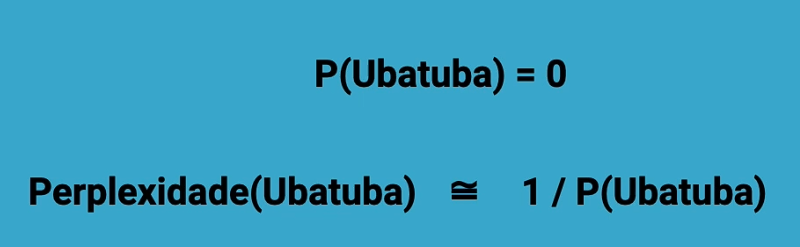

Para perplexidade não ser infinita, utilizar 'Laplace'

In [34]:
def treinar_model_laplace(lista_textos):
    todas_questoes = ' '.join(lista_textos)
    todas_palavras = WhitespaceTokenizer().tokenize(todas_questoes)
    bigrams, vocab = padded_everygram_pipeline(2, todas_palavras)
    model = Laplace(2)
    model.fit(bigrams, vocab)
    return model

In [35]:
model_ing_laplace = treinar_model_laplace(ing_train)
print(calc_perplexidade(model_ing_laplace, ing_test.iloc[0]))

213.13655559031736


In [36]:
print(calc_perplexidade(model_ing_laplace, port_test.iloc[0]))

1416.6712506935294


In [37]:
model_esp_laplace = treinar_model_laplace(esp_train)
print(calc_perplexidade(model_esp_laplace, ing_test.iloc[0]))

518.6617577753442


In [38]:
model_port_laplace = treinar_model_laplace(port_train)
print(calc_perplexidade(model_port_laplace, port_test.iloc[0]))

218.61868771568552


In [39]:
def atribuir_idioma(lista_textos):
    idioma = []
    for texto in lista_textos:
        portugues = calc_perplexidade(model_port_laplace, texto)
        ingles = calc_perplexidade(model_ing_laplace, texto)
        espanhol = calc_perplexidade(model_esp_laplace, texto)
        if ingles >= portugues <= espanhol:
            idioma.append('portugues')
        elif portugues > ingles < espanhol:
            idioma.append('ingles')
        else:
            idioma.append('espanhol')

    return idioma

In [40]:
resultados_port = atribuir_idioma(port_test)
acc_port = resultados_port.count('portugues')/ len(resultados_port)
resultados_port.count('portugues'), acc_port

(98, 0.98)

In [41]:
resultados_ing = atribuir_idioma(ing_test)
acc_ing = resultados_ing.count('ingles')/ len(resultados_ing)
resultados_ing.count('ingles'), acc_ing

(100, 1.0)

In [42]:
resultados_esp = atribuir_idioma(esp_test)
acc_esp = resultados_esp.count('espanhol')/ len(resultados_esp)
resultados_esp.count('espanhol'), acc_esp

(99, 0.99)

In [43]:
resultados_port

['portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'espanhol',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'espanhol',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portugues',
 'portug

# Final

Feitos:

* Aplicações dos Modelos de Linguagem;

* Como as Regex podem ser úteis para o tratamento de dados e principalmente para aplicações em NLP;

* E os metacaracteres das regex;

* Como utilizar Regex em Python;

* A usar os métodos re.sub, re.findall e re.compile;

* Como utilizar o método re.compile para reduzir o tempo de processamento,principalmente quando o volume de dados é muito grande;

* Como tratar dados textuais usando Regex;

* Quais os tratamentos são importantes para criação de um modelo de linguagem;

* Como refinar o tratamento dos dados;

* Regex para remover dígitos e pontuações;

* O que são os modelos de linguagem;

* Como NLTK nos ajuda na preparação dos dados para construção do ML;

* O que são os Fakechars;

* O que é o MLE;

* Como treinar um modelo de linguagem com NLTK;

* Como criar um função para treinar um ML;

* Como medir a qualidade de um modelo através da perplexidade;

* Como calcular a perplexidade usando NLTK;

* O que é perplexidade infinita;

* O que é modelo de Laplace;

* Como usar o modelo de Laplace para detectar idiomas;